
# Oscilloscope

Emulates an oscilloscope.

Output generated via `matplotlib.animation.Animation.to_jshtml`.


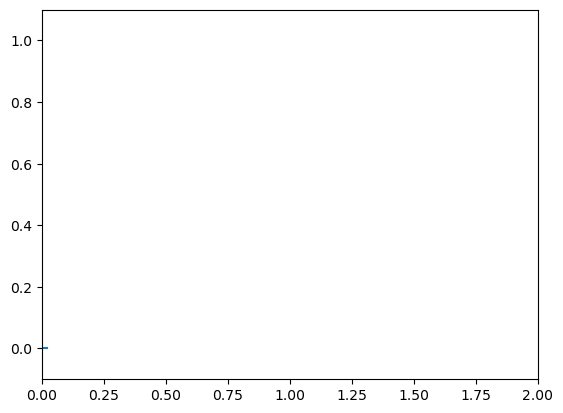

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.animation as animation
from matplotlib.lines import Line2D


class Scope:
    def __init__(self, ax, maxt=2, dt=0.02):
        self.ax = ax
        self.dt = dt
        self.maxt = maxt
        self.tdata = [0]
        self.ydata = [0]
        self.line = Line2D(self.tdata, self.ydata)
        self.ax.add_line(self.line)
        self.ax.set_ylim(-.1, 1.1)
        self.ax.set_xlim(0, self.maxt)

    def update(self, y):
        lastt = self.tdata[-1]
        if lastt >= self.tdata[0] + self.maxt:  # reset the arrays
            self.tdata = [self.tdata[-1]]
            self.ydata = [self.ydata[-1]]
            self.ax.set_xlim(self.tdata[0], self.tdata[0] + self.maxt)
            self.ax.figure.canvas.draw()

        # This slightly more complex calculation avoids floating-point issues
        # from just repeatedly adding `self.dt` to the previous value.
        t = self.tdata[0] + len(self.tdata) * self.dt

        self.tdata.append(t)
        self.ydata.append(y)
        self.line.set_data(self.tdata, self.ydata)
        return self.line,


def emitter(p=0.1):
    """Return a random value in [0, 1) with probability p, else 0."""
    while True:
        v = np.random.rand()
        if v > p:
            yield 0.
        else:
            yield np.random.rand()


# Fixing random state for reproducibility
np.random.seed(19680801 // 10)


fig, ax = plt.subplots()
scope = Scope(ax)

# pass a generator in "emitter" to produce data for the update func
ani = animation.FuncAnimation(fig, scope.update, emitter, interval=50,
                              blit=True, save_count=100)

plt.show()